In [ ]:
"""
Purpose: To read in all of the saved off validation dataframes and
display the score

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 17:04:49,749 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:49,751 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:49,752 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:49,758 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 17:04:49,758 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:49,770 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 17:04:50,226 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:50,230 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:50,231 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:50,232 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:50,233 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:50,233 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:50,234 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:50,235 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:50,724 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 17:04:50,881 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:04:50,883 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:04:50,884 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:04:50,889 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:04:51,388 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su
from pathlib import Path
import pandas_utils as pu

# Displaying he score

In [5]:
"""
Purpose: To read in all of the validation dataframes,
concatenate and then display the overall scores and then the individual scores

Pseudocode:
1) Get the filenames in the validation direction
2) For each filename load up the dataframe
3) concatenate the dataframes into one
4) Display the score

in lower box
5) For each dataframe collected, display the score for the segment_id
"""

'\nPurpose: To read in all of the validation dataframes,\nconcatenate and then display the overall scores and then the individual scores\n\nPseudocode:\n1) Get the filenames in the validation direction\n2) For each filename load up the dataframe\n3) concatenate the dataframes into one\n4) Display the score\n\nin lower box\n5) For each dataframe collected, display the score for the segment_id\n'

54 Dataframes loaded
Segment Id = 864691135113167769
Postsyn counts:
TP:198393
TN:1124
FP:287
FN:3093
Presyn counts:
TP:1649
TN:8365
FP:372
FN:554


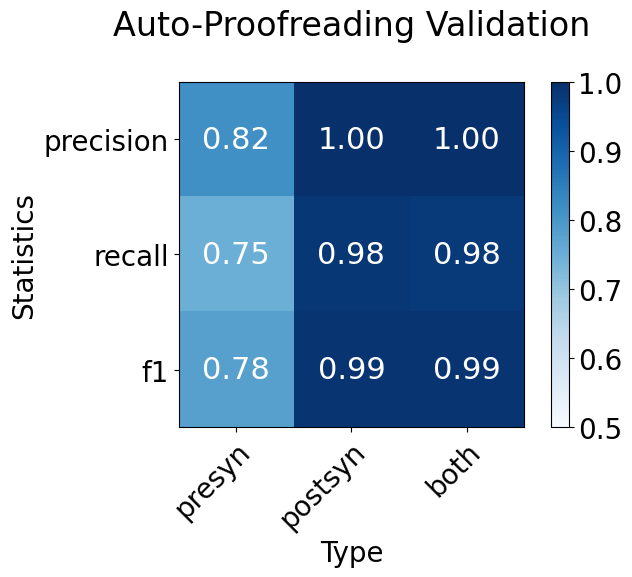

In [24]:
verbose = True

#1) Get the filenames in the validation direction
data_dir = "./validation_data/"
val_df_files = [k for k in list(Path(data_dir).iterdir()) if "ipynb" not in str(k)
               #and "864691136105493209" not in str(k)
               ]

#2) For each filename load up the dataframe
val_df = [su.decompress_pickle(k) for k in val_df_files]

if verbose:
    print(f"{len(val_df)} Dataframes loaded")

#3) concatenate the dataframes into one
total_val_df = pu.concat(val_df)

vu.synapse_validation_df_to_score_plot(total_val_df)

Segment Id = 864691135491233631
Postsyn counts:
TP:749
TN:1
FP:4
FN:3
Presyn counts:
TP:13
TN:140
FP:0
FN:0


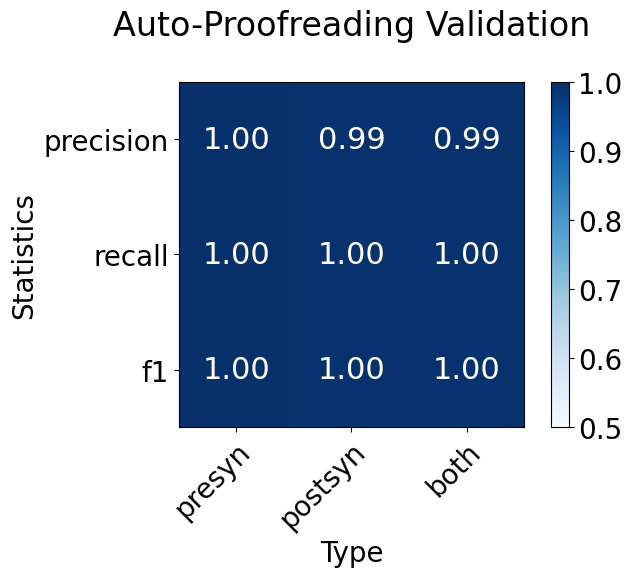

Segment Id = 864691136370815112
Postsyn counts:
TP:3892
TN:0
FP:0
FN:64
Presyn counts:
TP:6
TN:3
FP:4
FN:1


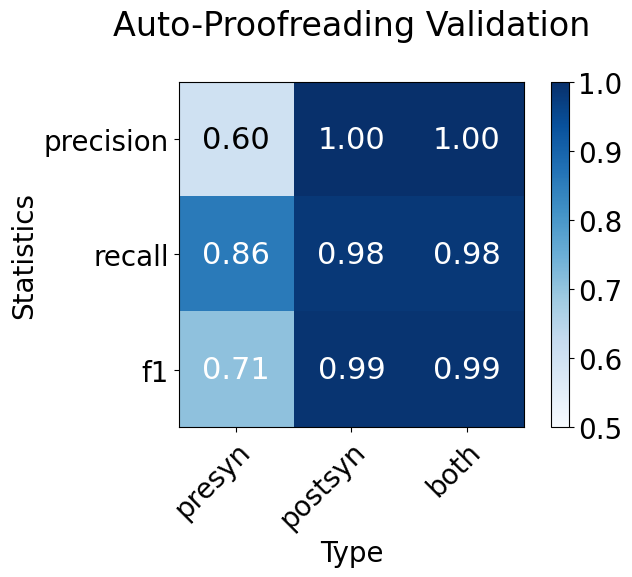

Segment Id = 864691135974454639
Postsyn counts:
TP:1741
TN:2
FP:7
FN:23
Presyn counts:
TP:2
TN:108
FP:0
FN:0


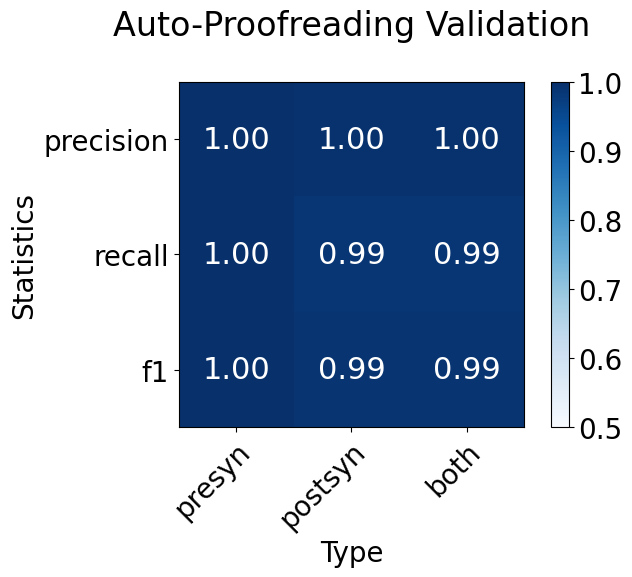

Segment Id = 864691135925564174
Postsyn counts:
TP:1591
TN:0
FP:1
FN:12
Presyn counts:
TP:8
TN:82
FP:1
FN:0


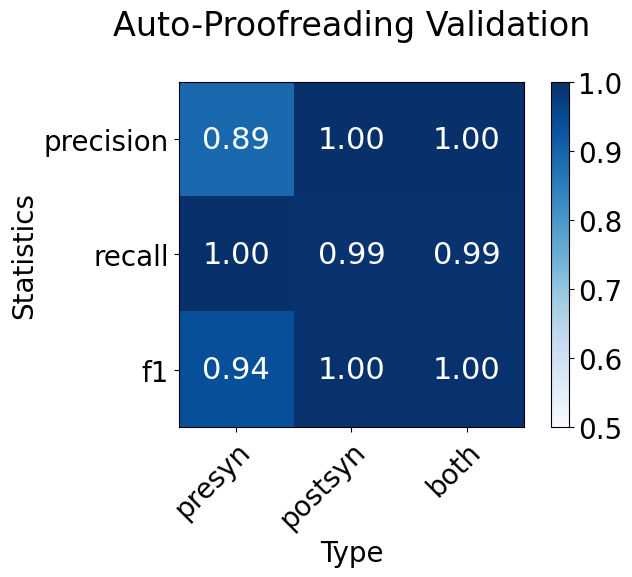

Segment Id = 864691135348272855
Postsyn counts:
TP:6012
TN:4
FP:6
FN:1
Presyn counts:
TP:40
TN:375
FP:12
FN:8


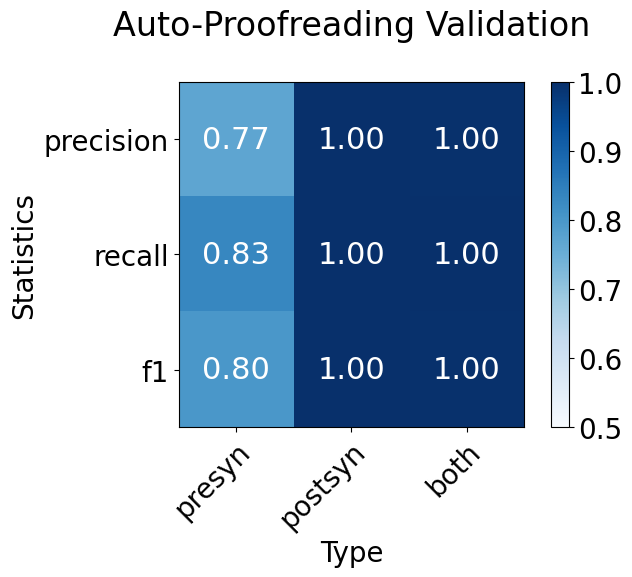

Segment Id = 864691136333790899
Postsyn counts:
TP:3788
TN:0
FP:1
FN:68
Presyn counts:
TP:72
TN:91
FP:25
FN:4


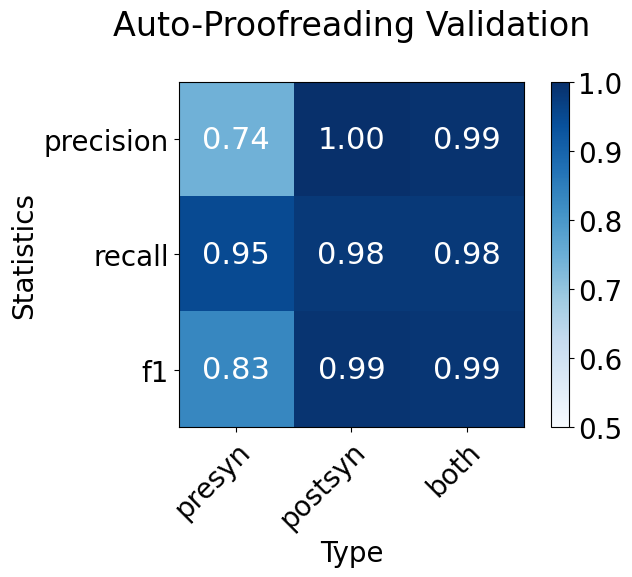

Segment Id = 864691135740225387
Postsyn counts:
TP:2007
TN:25
FP:3
FN:32
Presyn counts:
TP:31
TN:400
FP:3
FN:1


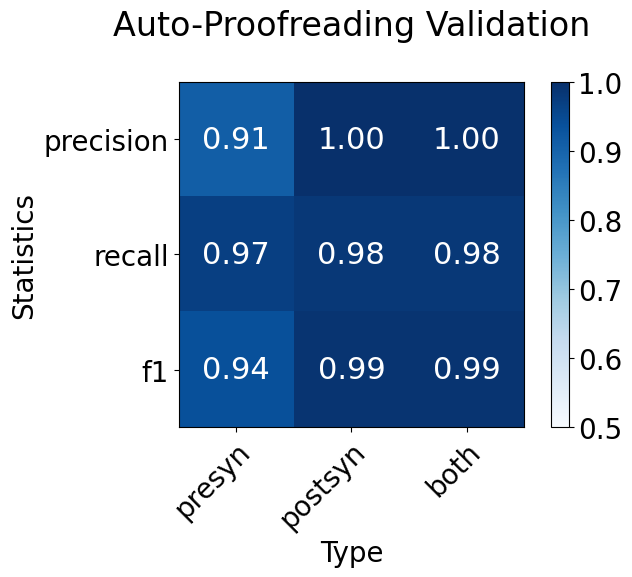

Segment Id = 864691136333776819
Postsyn counts:
TP:2024
TN:0
FP:4
FN:2
Presyn counts:
TP:7
TN:14
FP:0
FN:0


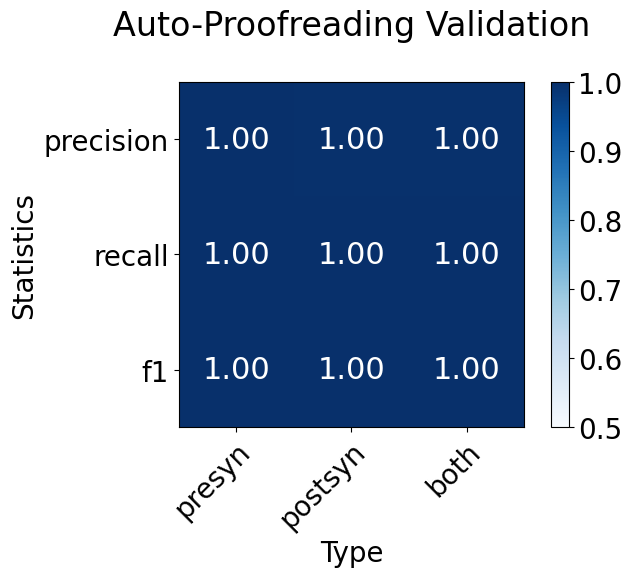

Segment Id = 864691135564655959
Postsyn counts:
TP:1124
TN:0
FP:0
FN:9
Presyn counts:
TP:6
TN:69
FP:0
FN:5


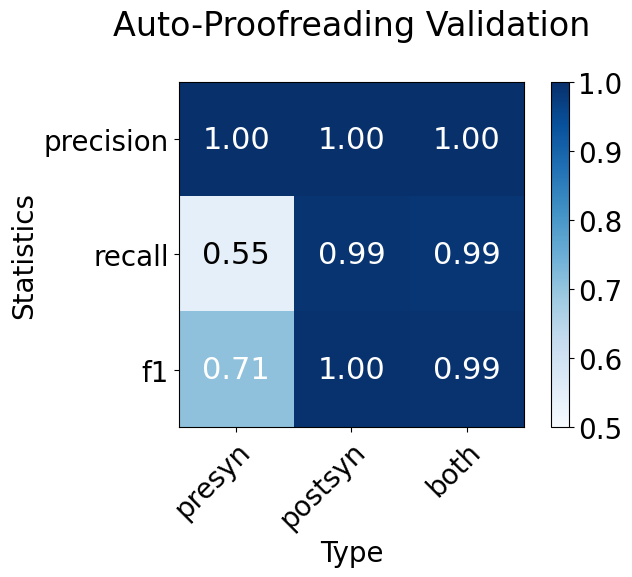

Segment Id = 864691135272164113
Postsyn counts:
TP:5636
TN:2
FP:14
FN:13
Presyn counts:
TP:31
TN:153
FP:0
FN:0


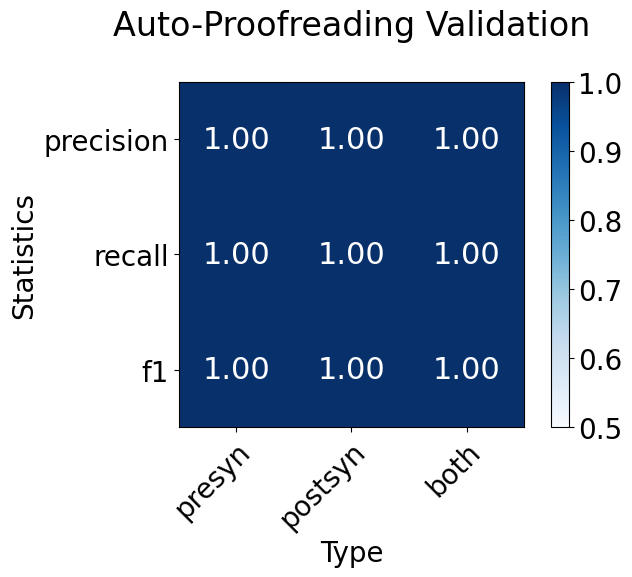

Segment Id = 864691136105498585
Postsyn counts:
TP:805
TN:0
FP:7
FN:66
Presyn counts:
TP:210
TN:0
FP:4
FN:25


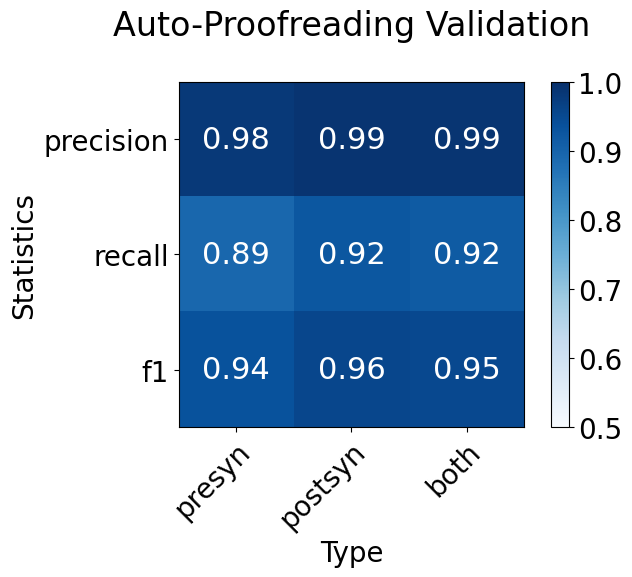

Segment Id = 864691136008573614
Postsyn counts:
TP:9823
TN:4
FP:1
FN:12
Presyn counts:
TP:8
TN:68
FP:0
FN:37


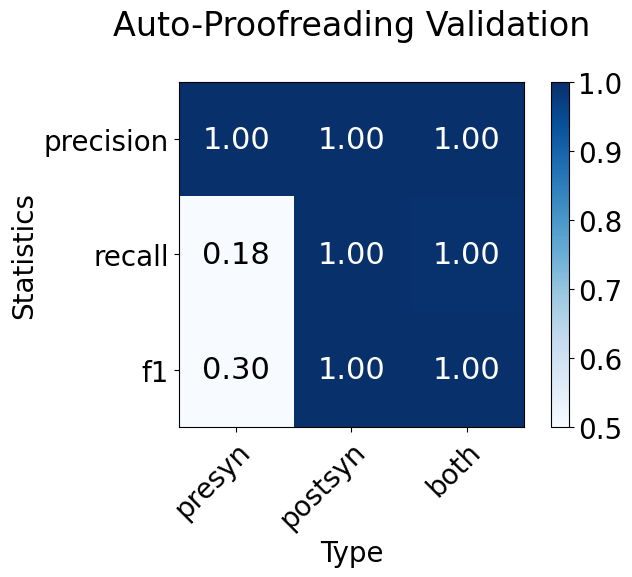

Segment Id = 864691136175008774
Postsyn counts:
TP:2238
TN:4
FP:2
FN:244
Presyn counts:
TP:105
TN:145
FP:15
FN:0


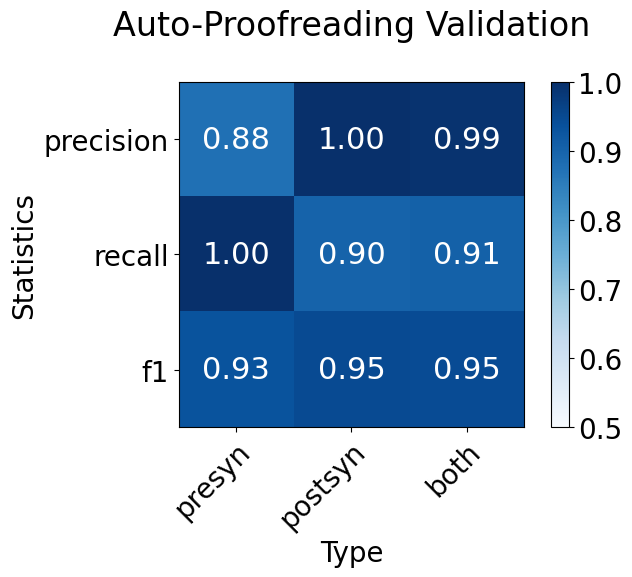

Segment Id = 864691135645592260
Postsyn counts:
TP:3127
TN:1
FP:1
FN:14
Presyn counts:
TP:28
TN:109
FP:4
FN:7


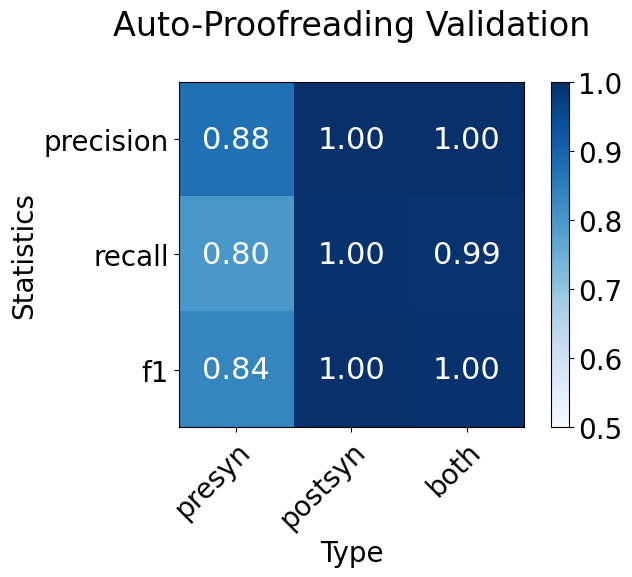

Segment Id = 864691136618412685
Postsyn counts:
TP:1754
TN:0
FP:2
FN:9
Presyn counts:
TP:23
TN:95
FP:4
FN:0


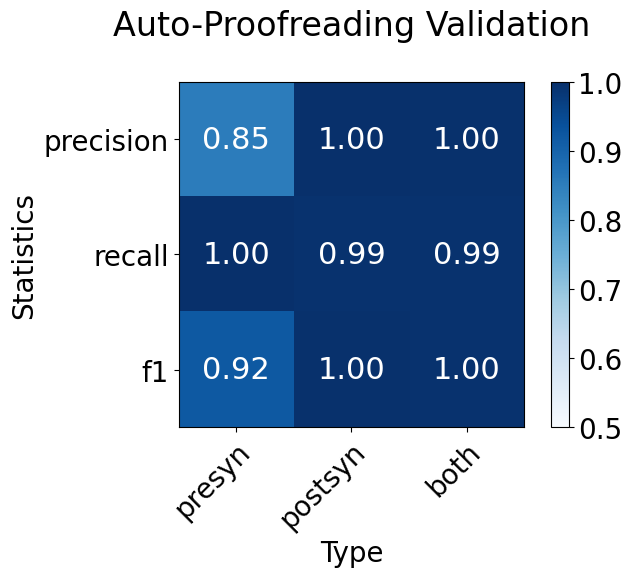

Segment Id = 864691136535575714
Postsyn counts:
TP:7041
TN:0
FP:6
FN:6
Presyn counts:
TP:0
TN:50
FP:0
FN:3


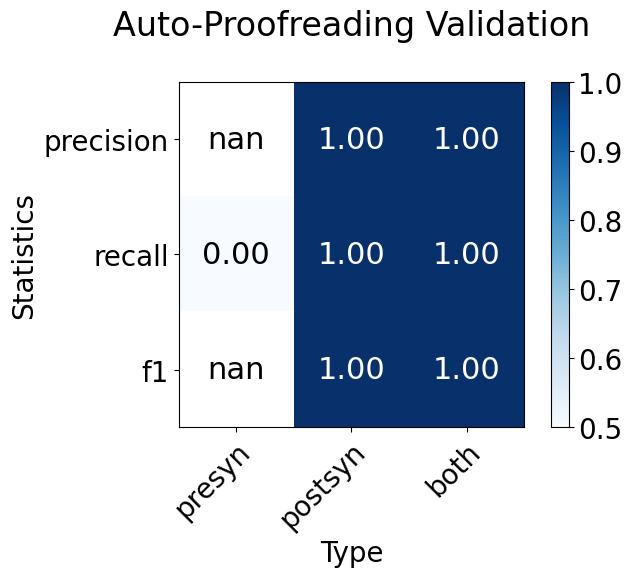

Segment Id = 864691135945413668
Postsyn counts:
TP:1536
TN:1
FP:0
FN:0
Presyn counts:
TP:0
TN:99
FP:0
FN:0


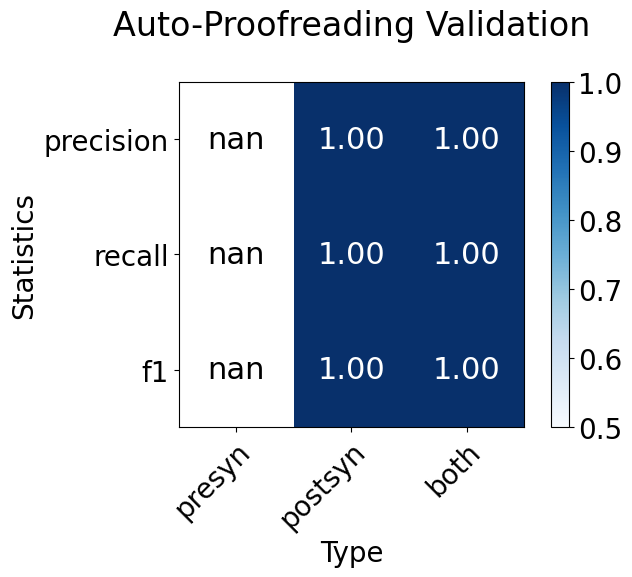

Segment Id = 864691136550489250
Postsyn counts:
TP:2462
TN:0
FP:1
FN:1
Presyn counts:
TP:20
TN:9
FP:3
FN:0


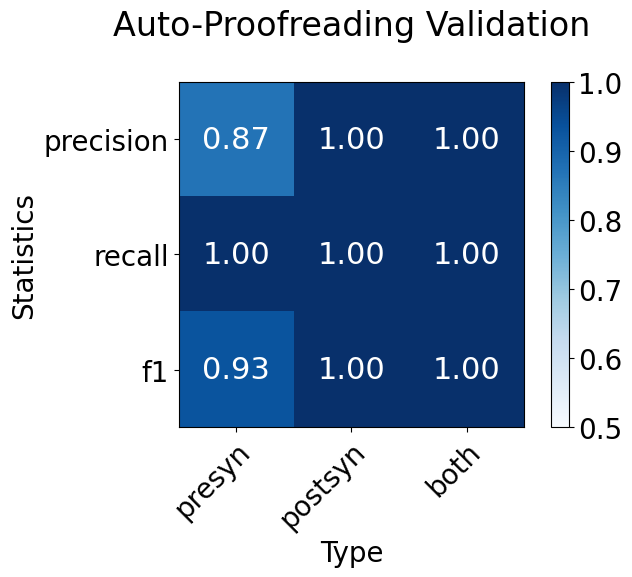

Segment Id = 864691136105493209
Postsyn counts:
TP:2796
TN:2
FP:2
FN:1
Presyn counts:
TP:14
TN:48
FP:3
FN:104


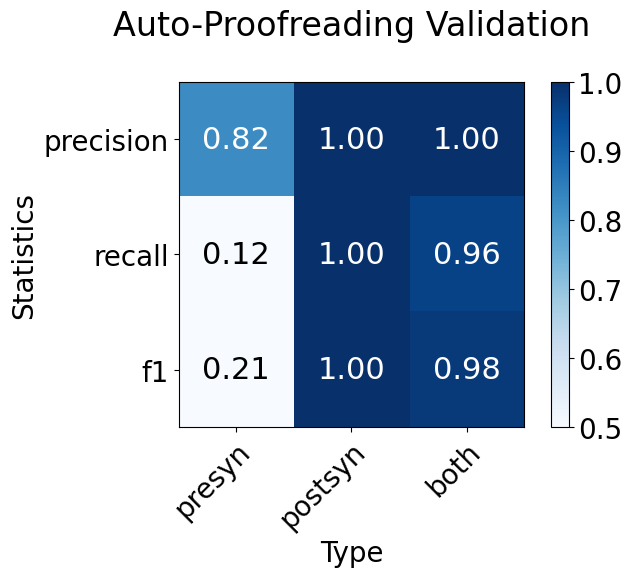

Segment Id = 864691135974454383
Postsyn counts:
TP:3600
TN:2
FP:49
FN:3
Presyn counts:
TP:59
TN:609
FP:28
FN:0


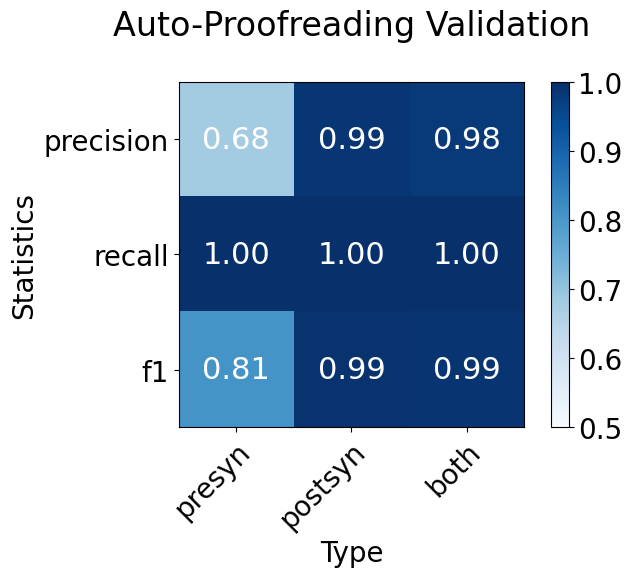

Segment Id = 864691135407289801
Postsyn counts:
TP:3325
TN:3
FP:4
FN:2
Presyn counts:
TP:0
TN:265
FP:0
FN:0


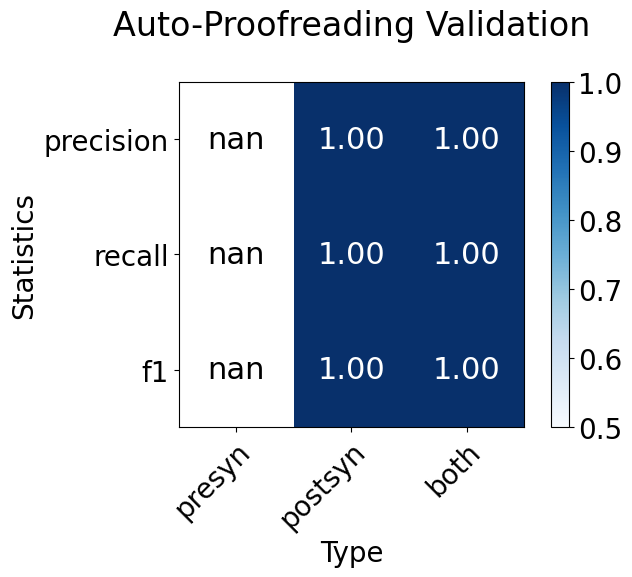

Segment Id = 864691135589907979
Postsyn counts:
TP:3887
TN:17
FP:4
FN:5
Presyn counts:
TP:38
TN:425
FP:16
FN:2


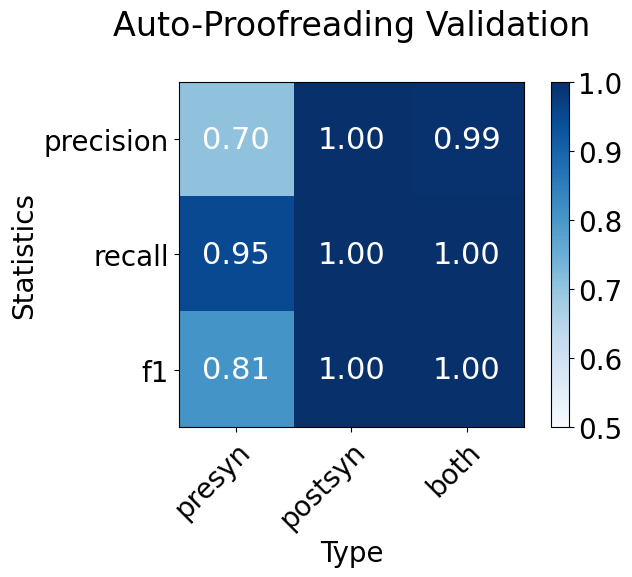

Segment Id = 864691135748575017
Postsyn counts:
TP:4524
TN:5
FP:0
FN:46
Presyn counts:
TP:12
TN:176
FP:6
FN:0


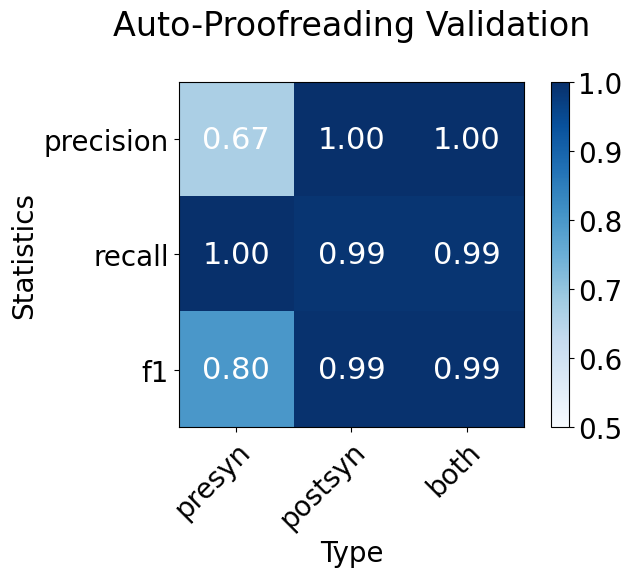

Segment Id = 864691136003930314
Postsyn counts:
TP:3870
TN:4
FP:8
FN:12
Presyn counts:
TP:11
TN:88
FP:1
FN:6


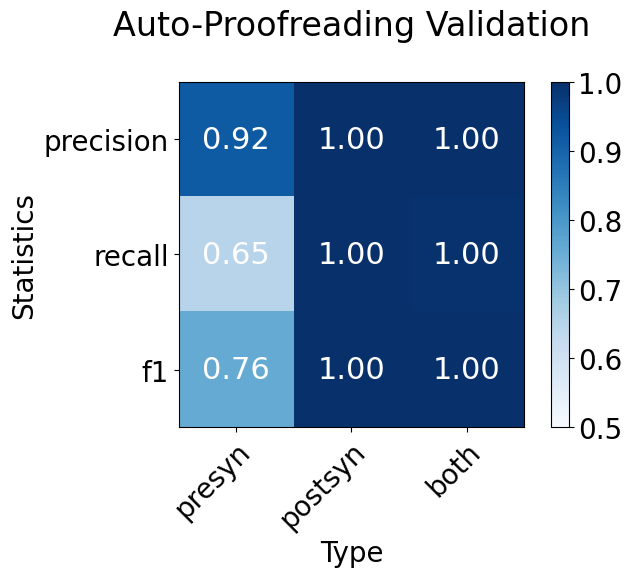

Segment Id = 864691136201041854
Postsyn counts:
TP:4630
TN:2
FP:2
FN:8
Presyn counts:
TP:5
TN:36
FP:1
FN:0


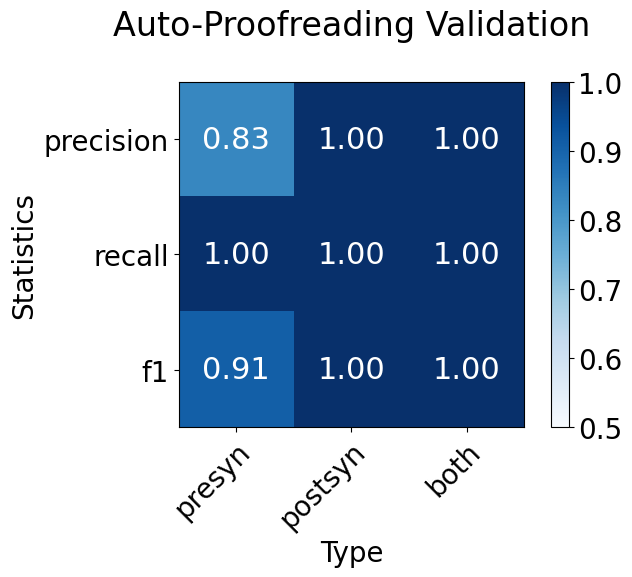

Segment Id = 864691135865518469
Postsyn counts:
TP:5152
TN:10
FP:6
FN:6
Presyn counts:
TP:0
TN:72
FP:0
FN:0


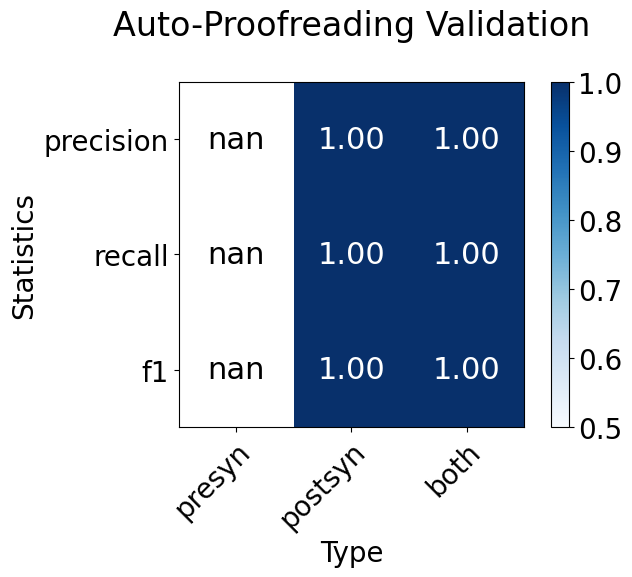

Segment Id = 864691136105484249
Postsyn counts:
TP:1724
TN:20
FP:2
FN:0
Presyn counts:
TP:10
TN:218
FP:0
FN:0


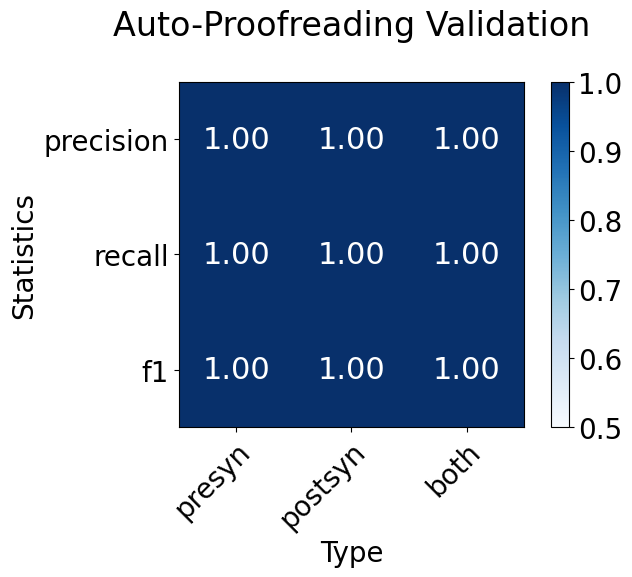

Segment Id = 864691135393964789
Postsyn counts:
TP:1528
TN:107
FP:0
FN:64
Presyn counts:
TP:0
TN:189
FP:3
FN:2


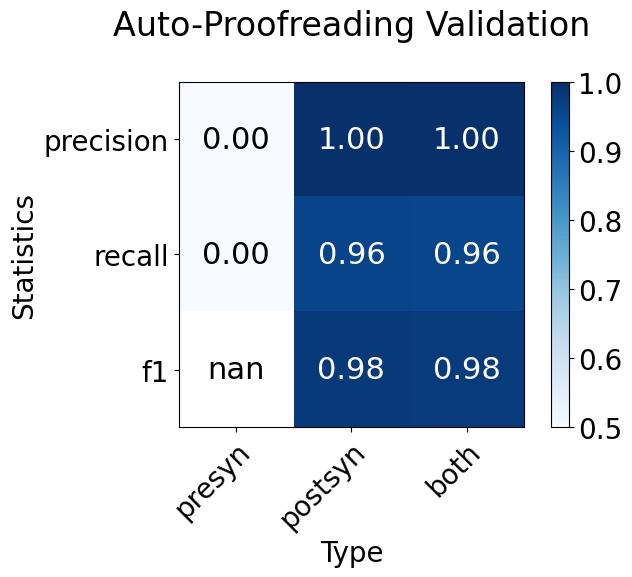

Segment Id = 864691135771629819
Postsyn counts:
TP:1465
TN:3
FP:2
FN:0
Presyn counts:
TP:56
TN:135
FP:25
FN:66


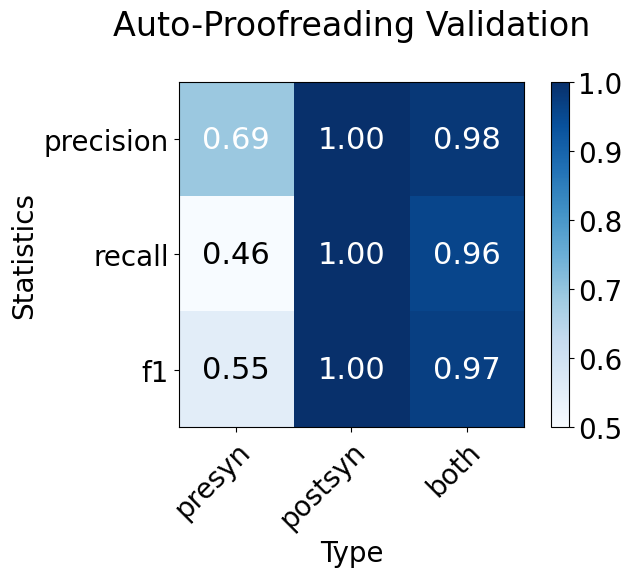

Segment Id = 864691135382947307
Postsyn counts:
TP:1624
TN:1
FP:0
FN:1009
Presyn counts:
TP:41
TN:20
FP:13
FN:4


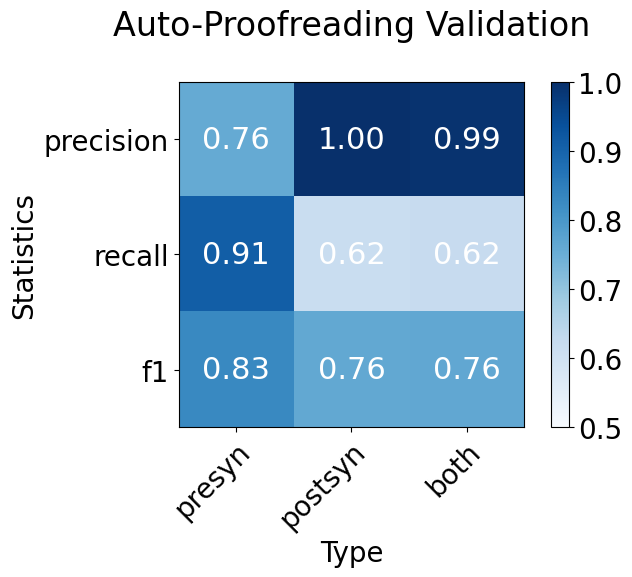

ERROR - 2021-04-24 17:27:12,543 - ultratb - Internal Python error in the inspect module.
Below is the traceback from this internal error.



Segment Id = 864691136537477538
Postsyn counts:
TP:6628
TN:1
FP:11
FN:0
Presyn counts:
TP:33
TN:11
FP:2
FN:3



KeyboardInterrupt



In [18]:
for v in val_df:
    vu.synapse_validation_df_to_score_plot(v)

In [22]:
FP_bad_neurons = [864691136333790899,
                 864691135974454383,
                 864691135589907979,
                 864691135771629819,
                 864691135212632448,
                 864691136194103510,
                 864691135866394390]
FP_bad_neurons = []
bad_threshold = 24
for v in val_df:
    s_dict = vu.synapse_validation_df_to_category_counts(v)["presyn"]
    seg_id = vu.validation_df_to_old_segment_id(v)
    FP_score = s_dict['FP']
    FN_score = s_dict['FN']
    #print(f"{seg_id}: FP = {FP_score}, FN = {FN_score}")
    print(f"{seg_id}: {s_dict}")
    if FP_score > bad_threshold or FN_score > bad_threshold:
        FP_bad_neurons.append(seg_id)

864691135491233631: {'TP': 13, 'TN': 140, 'FP': 0, 'FN': 0}
864691136370815112: {'TP': 6, 'TN': 3, 'FP': 4, 'FN': 1}
864691135974454639: {'TP': 2, 'TN': 108, 'FP': 0, 'FN': 0}
864691135925564174: {'TP': 8, 'TN': 82, 'FP': 1, 'FN': 0}
864691135348272855: {'TP': 40, 'TN': 375, 'FP': 12, 'FN': 8}
864691136333790899: {'TP': 72, 'TN': 91, 'FP': 25, 'FN': 4}
864691135740225387: {'TP': 31, 'TN': 400, 'FP': 3, 'FN': 1}
864691136333776819: {'TP': 7, 'TN': 14, 'FP': 0, 'FN': 0}
864691135564655959: {'TP': 6, 'TN': 69, 'FP': 0, 'FN': 5}
864691135272164113: {'TP': 31, 'TN': 153, 'FP': 0, 'FN': 0}
864691136105498585: {'TP': 210, 'TN': 0, 'FP': 4, 'FN': 25}
864691136008573614: {'TP': 8, 'TN': 68, 'FP': 0, 'FN': 37}
864691136175008774: {'TP': 105, 'TN': 145, 'FP': 15, 'FN': 0}
864691135645592260: {'TP': 28, 'TN': 109, 'FP': 4, 'FN': 7}
864691136618412685: {'TP': 23, 'TN': 95, 'FP': 4, 'FN': 0}
864691136535575714: {'TP': 0, 'TN': 50, 'FP': 0, 'FN': 3}
864691135945413668: {'TP': 0, 'TN': 99, 'FP': 0, 'F

In [23]:
FP_bad_neurons

[864691136333790899,
 864691136105498585,
 864691136008573614,
 864691136105493209,
 864691135974454383,
 864691135771629819,
 864691135212632448,
 864691136194103510,
 864691136194042326,
 864691135974454895,
 864691135866394390]